#  **<span style = "color:red"  > CTR Dataset </span>**

a digital advertising dataset for retail company during 6 days 



The size of this dataset is about 463291 rows and 15 columns 
(session_id ,DateTime  , user_id , product , campaign_id, webpage_id, product_category_1 , product_category_2, user_group_id ,gender, age_level , user_depth ,city_development_index ,var_1 ,is_click )

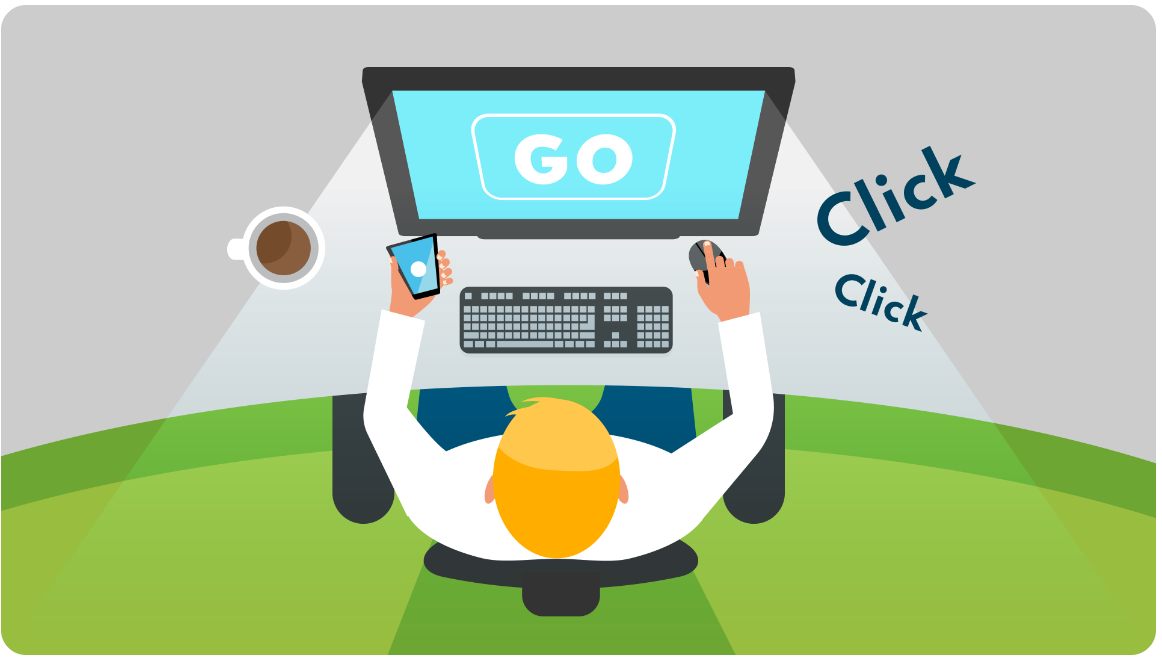

## **phase 1 ask **


  
#### **The business task:**

A company wants to know the CTR ( Click Through Rate ) in order to identify whether spending their money on digital advertising is worth or not.
A higher CTR represents more interest in that specific campaign, whereas a lower CTR can show that the ad may not be as relevant.
High CTRs are important because they show that more people are clicking through the website. Along with this high CTRs also help to get better ad position for less money on online platforms like Google, Bing etc.

**the business task is to answer those questions**

Gender percentage 
ctr rate per gender
ctr rate per day hour
ctr rate per product and gender
top 5 most popular product with the highest clicks

## **PHASE 2 : Prepare**

#### **Determine the credibility of the data:**

* The data is public data from  retail company between 02-07-2017 and 07-07-2017
* the files are sometimes organized 
* the data seems to be in good condition  


In [18]:
##loading libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
##upload data
ctr = pd.read_csv (r'C:\Users\sm04049449\python\Ad_click_prediction_train (1).csv')

In [11]:
ctr.shape

(463291, 15)

In [9]:
ctr.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463291 entries, 0 to 463290
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   session_id              463291 non-null  int64  
 1   DateTime                463291 non-null  object 
 2   user_id                 463291 non-null  int64  
 3   product                 463291 non-null  object 
 4   campaign_id             463291 non-null  int64  
 5   webpage_id              463291 non-null  int64  
 6   product_category_1      463291 non-null  int64  
 7   product_category_2      97437 non-null   float64
 8   user_group_id           445048 non-null  float64
 9   gender                  445048 non-null  object 
 10  age_level               445048 non-null  float64
 11  user_depth              445048 non-null  float64
 12  city_development_index  338162 non-null  float64
 13  var_1                   463291 non-null  int64  
 14  is_click            

In [10]:
ctr.dtypes

session_id                  int64
DateTime                   object
user_id                     int64
product                    object
campaign_id                 int64
webpage_id                  int64
product_category_1          int64
product_category_2        float64
user_group_id             float64
gender                     object
age_level                 float64
user_depth                float64
city_development_index    float64
var_1                       int64
is_click                    int64
dtype: object

In [7]:
ctr.describe()

,session_id,user_id,campaign_id,webpage_id,product_category_1,product_category_2,user_group_id,age_level,user_depth,city_development_index,var_1,is_click
count,463291.000000,4.632910e+05,463291.000000,463291.000000,463291.000000,97437.000000,445048.000000,445048.000000,445048.000000,338162.000000,463291.000000,463291.000000
mean,285544.090725,5.460497e+05,308474.540069,29685.878994,3.072427,162753.345105,3.477396,2.782266,2.878415,2.557121,0.422169,0.067627
std,168577.345887,3.294625e+05,126517.101294,21542.053106,1.304233,78743.742720,2.412889,1.069701,0.400130,0.921345,0.493906,0.251105
min,2.000000,4.000000e+00,82320.000000,1734.000000,1.000000,18595.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,137856.500000,2.578550e+05,118601.000000,13787.000000,2.000000,82527.000000,2.000000,2.000000,3.000000,2.000000,0.000000,0.000000
50%,285429.000000,5.318010e+05,359520.000000,13787.000000,3.000000,146115.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
75%,435535.500000,8.278490e+05,405490.000000,53587.000000,4.000000,254132.000000,4.000000,3.000000,3.000000,3.000000,1.000000,0.000000
max,595812.000000,1.141729e+06,414149.000000,60305.000000,5.000000,450184.000000,12.000000,6.000000,3.000000,4.000000,1.000000,1.000000


In [13]:
ctr.head(5)

,session_id,DateTime,user_id,product,campaign_id,webpage_id,product_category_1,product_category_2,user_group_id,gender,age_level,user_depth,city_development_index,var_1,is_click
0,140690,2017-07-02 00:00,858557,C,359520,13787,4,NaN,10.0,Female,4.0,3.0,3.0,0,0
1,333291,2017-07-02 00:00,243253,C,105960,11085,5,NaN,8.0,Female,2.0,2.0,NaN,0,0
2,129781,2017-07-02 00:00,243253,C,359520,13787,4,NaN,8.0,Female,2.0,2.0,NaN,0,0
3,464848,2017-07-02 00:00,1097446,I,359520,13787,3,NaN,3.0,Male,3.0,3.0,2.0,1,0
4,90569,2017-07-02 00:01,663656,C,405490,60305,3,NaN,2.0,Male,2.0,3.0,2.0,1,0


## **PHASE 3 : Process**
#### **1.Clean the data,**

after checking the data we will focus on those columns [session_id , DateTime , user_id, product , campaign_id , gender , is_click]

In [14]:
## filter the data 
ctr = ctr.iloc[:, [0,1,2,3,4,9,14]]
ctr.head(5)
               

,session_id,DateTime,user_id,product,campaign_id,gender,is_click
0,140690,2017-07-02 00:00,858557,C,359520,Female,0
1,333291,2017-07-02 00:00,243253,C,105960,Female,0
2,129781,2017-07-02 00:00,243253,C,359520,Female,0
3,464848,2017-07-02 00:00,1097446,I,359520,Male,0
4,90569,2017-07-02 00:01,663656,C,405490,Male,0


In [20]:
### uppercase all column names
ctr.columns = ctr.columns.str.upper()
ctr.columns

Index(['SESSION_ID', 'DATETIME', 'USER_ID', 'PRODUCT', 'CAMPAIGN_ID', 'GENDER',
       'IS_CLICK'],
      dtype='object')

In [22]:
##check duplication 
duplicate = ctr[ctr.duplicated()]
duplicate


,SESSION_ID,DATETIME,USER_ID,PRODUCT,CAMPAIGN_ID,GENDER,IS_CLICK


**===>  NO DUPLICATION**

In [24]:
### check all our missing values NA
ctr.isnull().sum()

SESSION_ID         0
DATETIME           0
USER_ID            0
PRODUCT            0
CAMPAIGN_ID        0
GENDER         18243
IS_CLICK           0
dtype: int64

**the Gender columns has many NA field, to ensure the reliability of our analysis**

In [32]:
##remove missing values NA
ctr = ctr.dropna()
## or ctr.dropna(subset=["GENDER"])

In [34]:
##check my 
ctr.isnull().sum()

SESSION_ID     0
DATETIME       0
USER_ID        0
PRODUCT        0
CAMPAIGN_ID    0
GENDER         0
IS_CLICK       0
dtype: int64

## **PHASE 4 : ANALYZE**
#### 1**Data exploration and visualization**

        VISIT_NUMBER
GENDER              
Female         16686
Male          127151


Text(0.5, 1.0, 'gender percentage')

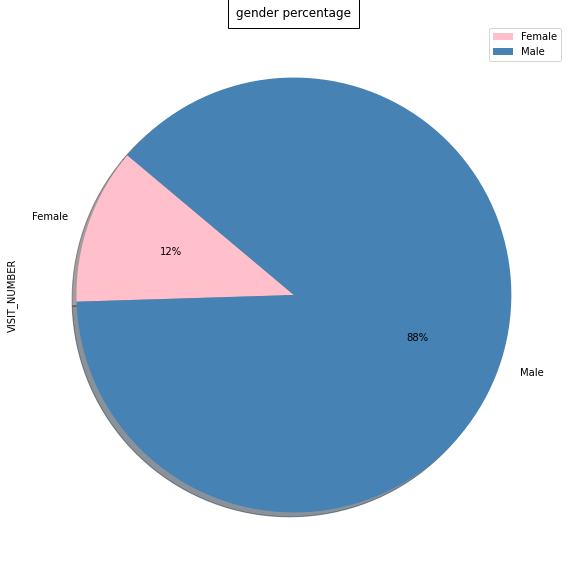

In [108]:
## pie chart of gender percentage %
gender_perc = ctr.groupby(["GENDER"]).agg(VISIT_NUMBER = ("USER_ID" , "nunique"))
print(gender_perc)
colors = ['pink', 'steelblue']  
plot = gender_perc.plot.pie(y= 'VISIT_NUMBER', figsize=(10, 10)  , autopct='%1.0f%%' , colors=colors , shadow=True, startangle=140 )
plt.title("gender percentage", bbox={'facecolor':'1', 'pad':8})


        SUM_CLICK  COUNT_CLICK  CTR_RATE   CTR_PER
GENDER                                            
Female       3325        51594  0.064445  6.444548
Male        26732       393454  0.067942  6.794187


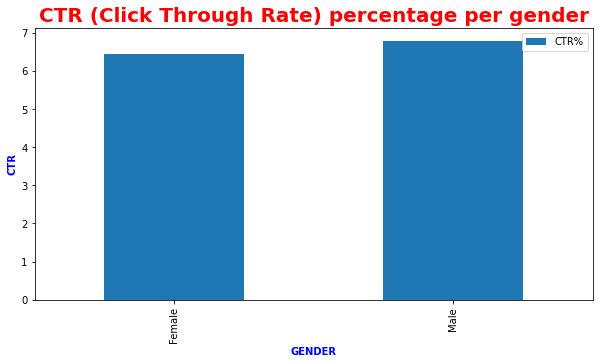

In [69]:
## Column Chart CTR (Click Through Rate) percentage per gender
ctr_gender = ctr.groupby(["GENDER"]).agg(SUM_CLICK = ("IS_CLICK" , "sum") , COUNT_CLICK =("IS_CLICK" , "count") )
ctr_gender["CTR_RATE"] = ctr_gender["SUM_CLICK"]/ctr_gender["COUNT_CLICK"]
ctr_gender["CTR_PER"] =  ctr_gender["CTR_RATE"] * 100
print(ctr_gender)
ctr_gender.plot(kind="bar", y = "CTR_PER" ,figsize=(15, 5) )
plt.title("CTR (Click Through Rate) percentage per gender" , color = "red" ,fontsize = 20, fontweight = "bold")
plt.xlabel("GENDER",color = "blue",fontweight = "bold")
plt.ylabel("CTR", color = "blue", fontweight = "bold")
plt.legend(["CTR%"], loc=1)




In [76]:
## create new column Hour
ctr["HOUR"]= ctr["DATETIME"].dt.hour
ctr.head(5)

,SESSION_ID,DATETIME,USER_ID,PRODUCT,CAMPAIGN_ID,GENDER,IS_CLICK,HOUR
0,140690,2017-07-02 00:00:00,858557,C,359520,Female,0,0
1,333291,2017-07-02 00:00:00,243253,C,105960,Female,0,0
2,129781,2017-07-02 00:00:00,243253,C,359520,Female,0,0
3,464848,2017-07-02 00:00:00,1097446,I,359520,Male,0,0
4,90569,2017-07-02 00:01:00,663656,C,405490,Male,0,0


      SUM_CLICK  COUNT_CLICK  CTR_RATE   CTR_PER
HOUR                                            
0           143         2107  0.067869  6.786901
1           113         1501  0.075283  7.528314
2            75         1489  0.050369  5.036938
3           299         4758  0.062842  6.284153
4           576        10181  0.056576  5.657597
5           966        14475  0.066736  6.673575
6          1458        20019  0.072831  7.283081
7          1737        23530  0.073821  7.382065
8          1734        24761  0.070029  7.002948
9          1686        24063  0.070066  7.006608
10         1974        29236  0.067519  6.751950
11         1837        26227  0.070042  7.004232
12         1656        24109  0.068688  6.868804
13         1596        24165  0.066046  6.604593
14         1630        24957  0.065312  6.531234
15         1433        22605  0.063393  6.339305
16         1393        20617  0.067566  6.756560
17         1444        21934  0.065834  6.583387
18         1706     

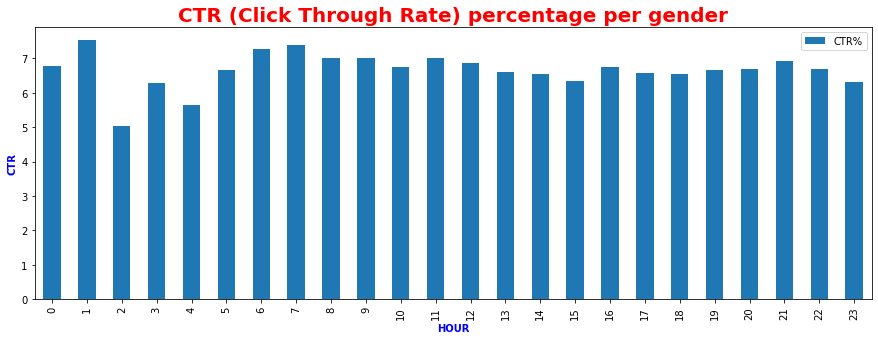

In [106]:
#### Column Chart CTR (Click Through Rate) percentage per daily hours

ctr_hour = ctr.groupby(["HOUR"]).agg(SUM_CLICK = ("IS_CLICK" , "sum") , COUNT_CLICK =("IS_CLICK" , "count") )
ctr_hour["CTR_RATE"] = ctr_hour["SUM_CLICK"]/ctr_hour["COUNT_CLICK"]
ctr_hour ["CTR_PER"] =  ctr_hour["CTR_RATE"] * 100
print(ctr_hour)
ctr_hour.plot(kind="bar", y = "CTR_PER" ,figsize=(15, 5) )
plt.title("CTR (Click Through Rate) percentage per gender" , color = "red" ,fontsize = 20, fontweight = "bold")
plt.xlabel("HOUR",color = "blue",fontweight = "bold")
plt.ylabel("CTR", color = "blue", fontweight = "bold")
plt.legend(["CTR%"], loc=1)


GENDER     Female      Male
PRODUCT                    
A        6.838800  6.029734
B        6.076446  5.428273
C        6.226657  6.990745
D        6.895806  7.261161
E        6.467890  6.961374
F        5.652174  4.641424
G        5.029240  4.536132
H        6.661937  6.992661
I        6.242158  6.409624
J        8.991228  9.426965


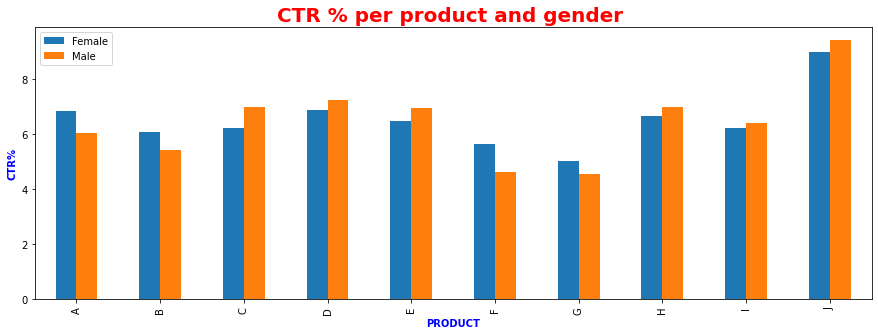

In [98]:
##Column Chart CTR (Click Through Rate) percentage per product and gender 

ctr_product = ctr.groupby(["PRODUCT","GENDER"]).agg(SUM_CLICK = ("IS_CLICK" , "sum") , COUNT_CLICK =("IS_CLICK" , "count") )
ctr_product["CTR_RATE"] = ctr_product["SUM_CLICK"]/ctr_product["COUNT_CLICK"]
ctr_product["CTR_PER"] =  ctr_product["CTR_RATE"] * 100
ctr_product = pd.pivot_table(ctr_product, index= "PRODUCT" , columns = "GENDER" , values = "CTR_PER" )
print(ctr_product)
ctr_product.plot(kind="bar", figsize=(15, 5))
plt.title("CTR % per product and gender " , color = "red" ,fontsize = 20, fontweight = "bold")
plt.xlabel("PRODUCT",color = "blue",fontweight = "bold")
plt.ylabel("CTR%", color = "blue", fontweight = "bold")
plt.legend(loc=2)


         SUM_CLICK
PRODUCT           
A              897
B             1174
E             1426
D             2853
C            10902


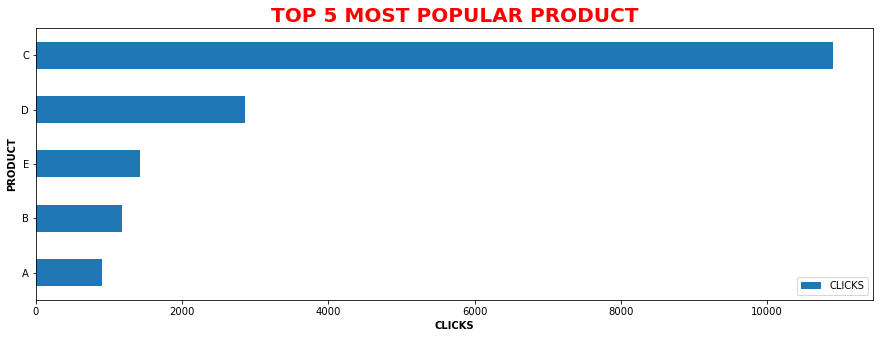

In [105]:
top_5_product = ctr.groupby(["PRODUCT"]).agg(SUM_CLICK = ("IS_CLICK" , "sum"))
top_5_product = top_5_product.head(5)
top_5_product = top_5_product.sort_values('SUM_CLICK')
top_5_product = top_5_product.head(5)
print(top_5_product)
top_5_product.plot(kind="barh",figsize=(15, 5))
plt.title("TOP 5 MOST POPULAR PRODUCT" , color = "red" ,fontsize = 20, fontweight = "bold")
plt.xlabel("CLICKS",fontweight = "bold")
plt.ylabel("PRODUCT",fontweight = "bold")
plt.legend(["CLICKS"])


                                             
                                             
                                             